<a href="https://colab.research.google.com/github/aikkel/MLEksammens/blob/main/HueColorWithKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Importing necessary libraries
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans

In [ ]:
# cell 2
# Mount Google Drive and read the dataset
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/color_namesV2.csv'
dataset = pd.read_csv(path)

# Drop RGB and Hex columns
dataset.drop(columns=["Red (8 bit)", "Green (8 bit)", "Blue (8 bit)", "Hex (24 bit)"], inplace=True)

# Assuming dataset contains Hue values in X
X = dataset[["Hue (degrees)"]]

# Define the number of clusters
k = 6  # Adjust as needed

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Assign color labels based on proximity to centroids
def assign_color_label(hue):
    distances = np.abs(centroids - hue)
    closest_centroid_idx = np.argmin(distances)
    color_label = ["Red", "Orange", "Yellow", "Green", "Blue", "Purple"][closest_centroid_idx]
    return color_label

# Initialize color labels list
color_labels = [assign_color_label(hue) for hue in X["Hue (degrees)"]]

# Assign color labels to the dataset
dataset["ColorCategory"] = color_labels

# Print the unique color labels assigned to the dataset
print("Unique color labels assigned:", np.unique(color_labels))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Unique color labels assigned: ['Blue' 'Green' 'Orange' 'Purple' 'Red' 'Yellow']


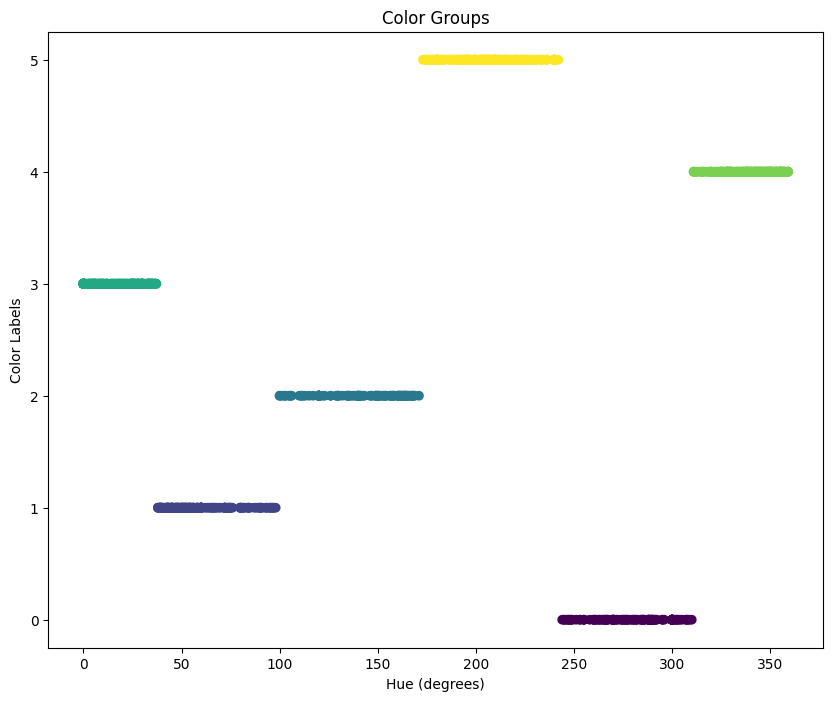

In [ ]:
# cell 3
# Create a mapping from color labels to numeric values for plotting
color_mapping = {label: idx for idx, label in enumerate(np.unique(color_labels))}
color_values = dataset["ColorCategory"].map(color_mapping)

# Create a 2D scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot of Hue values with assigned color labels
plt.scatter(X["Hue (degrees)"], color_values, c=color_values, cmap='viridis')

# Set labels and title
plt.xlabel('Hue (degrees)')
plt.ylabel('Color Labels')
plt.title('Color Groups')

# Show plot
plt.show()


In [ ]:
# Cell 4: Preprocessing and splitting the dataset
features = dataset[["Hue (degrees)"]]
color_labels = dataset["ColorCategory"]  # Using assigned color labels as target variable
X_train, X_test, y_train, y_test = train_test_split(features, color_labels, test_size=0.2, random_state=42)


In [ ]:
# Cell 5: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Cell 6: Training and evaluating the kNN model with scaled features
knn_model_scaled = KNeighborsClassifier(n_neighbors=33)  # Using k=33 as an example
knn_model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
classification_rep_scaled = classification_report(y_test, y_pred_scaled)
print("Accuracy after scaling:", accuracy_scaled)
print("Classification Report after scaling:\n", classification_rep_scaled)


Accuracy after scaling: 0.9769230769230769
Classification Report after scaling:
               precision    recall  f1-score   support

        Blue       1.00      0.87      0.93        31
       Green       0.96      1.00      0.98        44
      Orange       1.00      0.94      0.97        34
      Purple       1.00      1.00      1.00        55
         Red       0.98      1.00      0.99        50
      Yellow       0.94      1.00      0.97        46

    accuracy                           0.98       260
   macro avg       0.98      0.97      0.97       260
weighted avg       0.98      0.98      0.98       260



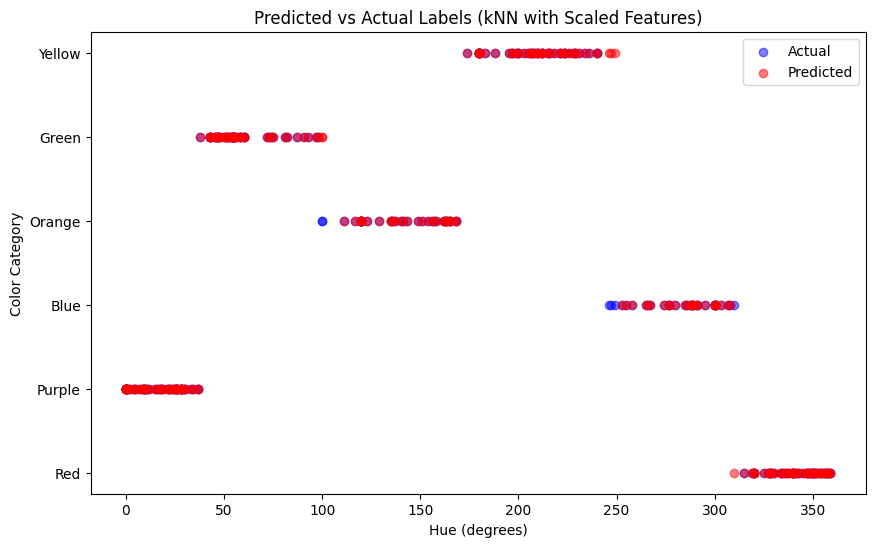

In [ ]:
# Visualization for kNN model with scaled features
plt.figure(figsize=(10, 6))
plt.scatter(X_test["Hue (degrees)"], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test["Hue (degrees)"], y_pred_scaled, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Hue (degrees)')
plt.ylabel('Color Category')
plt.title('Predicted vs Actual Labels (kNN with Scaled Features)')
plt.legend()
plt.show()

In [ ]:
# Cell 7: Training and evaluating the kNN model without scaling
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9961538461538462
Classification Report:
               precision    recall  f1-score   support

        Blue       1.00      0.97      0.98        31
       Green       1.00      1.00      1.00        44
      Orange       1.00      1.00      1.00        34
      Purple       1.00      1.00      1.00        55
         Red       0.98      1.00      0.99        50
      Yellow       1.00      1.00      1.00        46

    accuracy                           1.00       260
   macro avg       1.00      0.99      1.00       260
weighted avg       1.00      1.00      1.00       260



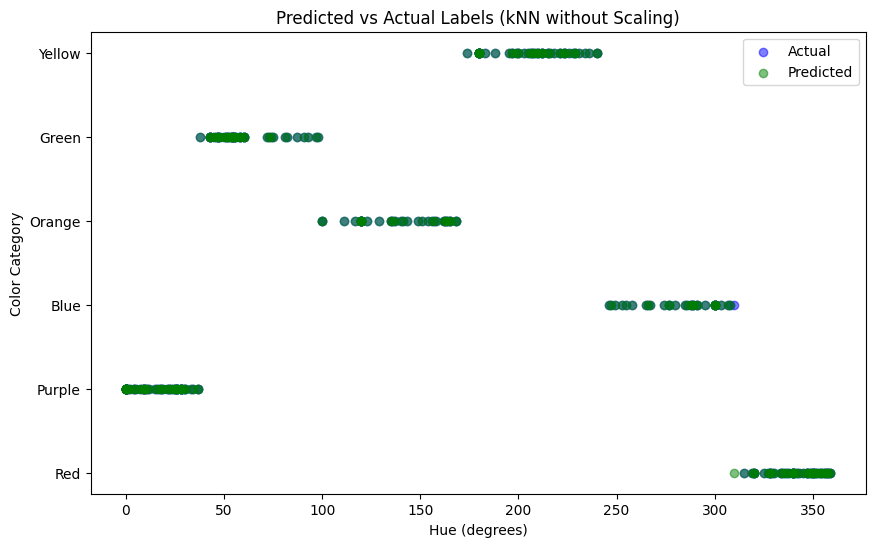

In [ ]:
# Visualization for kNN model without scaling
plt.figure(figsize=(10, 6))

# Scatter plot of actual labels
plt.scatter(X_test["Hue (degrees)"], y_test, color='blue', label='Actual', alpha=0.5)

# Scatter plot of predicted labels
plt.scatter(X_test["Hue (degrees)"], y_pred, color='green', label='Predicted', alpha=0.5)

# Set labels and title
plt.xlabel('Hue (degrees)')
plt.ylabel('Color Category')
plt.title('Predicted vs Actual Labels (kNN without Scaling)')
plt.legend()

# Show plot
plt.show()


In [ ]:
# Cell 8: Summary of dataset and preprocessing
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)
print("Missing Values in Training Features:\n", X_train.isnull().sum())
print("Missing Values in Testing Features:\n", X_test.isnull().sum())
print("Training Features Summary:")
print(X_train.describe())
print("\nTesting Features Summary:")
print(X_test.describe())

Training Features Shape: (1038, 1)
Training Labels Shape: (1038,)
Testing Features Shape: (260, 1)
Testing Labels Shape: (260,)
Missing Values in Training Features:
 Hue (degrees)    0
dtype: int64
Missing Values in Testing Features:
 Hue (degrees)    0
dtype: int64
Training Features Summary:
       Hue (degrees)
count    1038.000000
mean      164.620424
std       124.805779
min         0.000000
25%        38.000000
50%       170.000000
75%       288.000000
max       359.000000

Testing Features Summary:
       Hue (degrees)
count     260.000000
mean      167.850000
std       122.258021
min         0.000000
25%        47.000000
50%       165.000000
75%       288.000000
max       359.000000


Saving model

In [ ]:
import joblib

# Define the file path to save the model
model_file_path = '/content/drive/MyDrive/Colab Notebooks/KNN_model/scaled_knn_model.pkl'

# Save the trained kNN model with scaled features
joblib.dump(knn_model_scaled, model_file_path)
joblib.dump(knn_model, model_file_path)

print("Scaled kNN model saved successfully at:", model_file_path)
print("kNN model saved successfully at:", model_file_path)


Scaled kNN model saved successfully at: /content/drive/MyDrive/Colab Notebooks/KNN_model/scaled_knn_model.pkl
kNN model saved successfully at: /content/drive/MyDrive/Colab Notebooks/KNN_model/scaled_knn_model.pkl
